In [1]:
cd ../..

/Users/ericpei/Documents/GalvClas/fantasy-score-predictor


In [2]:
from scripts import make_df

In [3]:
from scripts import random_forest

/Users/ericpei/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
#make_df.create_csvs('alldata')

In [5]:
df = make_df.create_df()

In [6]:
df = make_df.clean_df(df)

scripts/make_df.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['MP'] = df['MP'].map(lambda x: '0:00' if ":" not in str(x) else str(x))


In [7]:
df = make_df.drop_zerominutes(df)

In [8]:
df = make_df.add_features(df)

In [9]:
#look at this later
Player_Averages = make_df.make_averages(df)

In [10]:
date_matrix = make_df.get_date_matrix(df)

In [11]:
make_df.addcolumns(make_df.make_lists(date_matrix), df)

In [12]:
tp_matrix = df[['Player Name', '3P']].values
fg_matrix = df[['Player Name', 'FG']].values
ft_matrix = df[['Player Name', 'FT']].values
reb_matrix = df[['Player Name', 'TRB']].values
ast_matrix = df[['Player Name', 'AST']].values
blk_matrix = df[['Player Name', 'BLK']].values
stl_matrix = df[['Player Name', 'STL']].values
tov_matrix = df[['Player Name', 'TOV']].values
usg_matrix = df[['Player Name', 'USG%']].values
ftr_matrix = df[['Player Name', 'FTr']].values
pm_matrix = df[['Player Name', '+/-']].values
ts_matrix = df[['Player Name', 'TS%']].values
pf_matrix = df[['Player Name', 'PF']].values
ortg_matrix = df[['Player Name', 'ORtg']].values
drtg_matrix = df[['Player Name', 'DRtg']].values

In [13]:
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tp_matrix, column='3P'), df, name='TP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=fg_matrix, column='FG'), df, name='FG')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ft_matrix, column='FT'), df, name='FT')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=reb_matrix, column='TRB'), df, name='TRB')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ast_matrix, column='AST'), df, name='AST')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=blk_matrix, column='BLK'), df, name='BLK')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=stl_matrix, column='STL'), df, name='STL')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=tov_matrix, column='TOV'), df, name='TOV')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=usg_matrix, column='USG%'), df, name ='USGP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ftr_matrix, column='FTr'), df, name ='FTr')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pm_matrix, column='+/-'), df, name ='PM')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ts_matrix, column='TS%'), df, name ='TSP')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=pf_matrix, column='PF'), df, name ='PF')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=ortg_matrix, column='ORtg'), df, name ='ORtg')
make_df.add_slag_columns(make_df.make_stat_lists(Player_Averages, matrix=drtg_matrix, column='DRtg'), df, name ='DRtg')

In [14]:
from scripts import elevation_flight

In [15]:
Elevation_Lookup = elevation_flight.read_to_dict()

In [16]:
elevation_flight.lookup_and_add(Elevation_Lookup, df)

# Exploration

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
from sklearn.ensemble import RandomForestRegressor

### Make a testing Set

In [19]:
forest_df, y_df = random_forest.date_with_forest(df, 140, remove_date=True)

In [20]:
test_df, testy_df = random_forest.date_with_forest(df, remove_date=False)

In [21]:
import datetime

In [22]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [23]:
test_df = test_df[test_df['Date'] > stop_average_date]
testy_df = testy_df[testy_df['Date'] > stop_average_date]

In [24]:
test_df = test_df.ix[:,test_df.columns != 'Date']
testy_df = testy_df.ix[:, testy_df.columns != 'Date']

In [25]:
#forest_df, y_df = random_forest.prepare_for_forest(df)

In [26]:
TestSubject = 'Stephen Curry'

In [27]:
Stephcurry, Stephcurryafter_X, Stephcurryafter_y = random_forest.individual_forest_df(test_df, testy_df, TestSubject)

In [28]:
Stephcurry, Stephcurry_X, Stephcurry_y = random_forest.individual_forest_df(forest_df, y_df, TestSubject)

In [29]:
X_train, X_test, y_train, y_test = random_forest.crossval_player(Stephcurry, forest_df[forest_df["Player Name"] != TestSubject], y_df[y_df['Player Name'] != TestSubject], cat=2)
X_trainA, X_testA, y_trainA, y_testA = random_forest.crossval_player(Stephcurry, test_df, testy_df, cat=2)
X_trainS, X_testS, y_trainS, y_testS = random_forest.crossval_player(Stephcurry, Stephcurry_X, Stephcurry_y, cat=2)
X_trainSA, X_testSA, y_trainSA, y_testSA = random_forest.crossval_player(Stephcurry, Stephcurryafter_X, Stephcurryafter_y, cat = 2)

scripts/random_forest.py:69: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  X_train, X_test, y_train, y_test = train_test_split(player_x[list(player_x.columns-['Player Name'])], player_y.iloc[:,cat], test_size = 0.25, random_state = 30)


###### X Train is the df without Curry
###### X Train2 is the df with just Curry
###### S = Curry A is after cutoff

In [30]:
X_trainfull = pd.concat([X_train, X_trainS, X_trainS, X_trainSA])
y_trainfull = pd.concat([y_train, y_trainS, y_trainS, y_trainSA])

Now X Train2 is just Curry, while X Train is everyone including Curry

In [31]:
everyFGmean = pd.concat([y_train, y_trainS]).mean()
stephFGmean = y_trainS.mean()

In [32]:
len(X_test), len(X_testSA)

(63340, 15)

In [33]:
benchmark = np.full(len(X_testA)+len(X_testSA), everyFGmean)
s_benchmark = np.full(len(X_testSA), stephFGmean)

In [34]:
rf = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [35]:
rf.fit(X_trainfull, y_trainfull)
rf2.fit(X_trainS, y_trainS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
y_predict = rf.predict(X_testA)
y_predict = np.append(y_predict, rf.predict(X_testSA))# + rf.predict(X_test2)
y_predictS = rf2.predict(X_testSA)

### MSE of Everyone model on everyone. MSE of my StephCurry Model on himself

In [37]:
mean_squared_error(np.append(y_testA,y_testSA), y_predict), mean_squared_error(y_testSA, y_predictS)

(5.854893362567271, 19.140666666666668)

## How do we do against the benchmark?

In [38]:
mean_squared_error(np.append(y_testA,y_testSA), benchmark), mean_squared_error(y_testSA, s_benchmark)

(8.9781839328617004, 25.563534681891728)

#### We have a lower MSE than average on all players
#### Lower MSE on Curry compared to his own average

In [39]:
y_predict3 = rf.predict(X_testSA)
mean_squared_error(y_testSA, y_predict3)

24.079333333333331

# Averages Per Min

In [40]:
from scripts import pca_ready

In [41]:
PA = make_df.make_averages(df, cutoff=14)

In [42]:
PA48 = make_df.make_averages_per48(PA)

In [43]:
mat, comp = pca_ready.run_pca(PA48.iloc[:,:8])

In [44]:
from sklearn.cluster import KMeans

In [45]:
km = KMeans(n_clusters=5, random_state = 30)
#km = KMeans(n_clusters=10, random_state = 30)


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

([array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,   20.,  230.,  324.,  229.,  223.,  128.,   30.,    4.,
            1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            1.,    0.,    1.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    7.,    4.,
            7.,   32.,  135.,  336.,  326.,  214.,   75.,   32.,   15.,
            5.,    1.,    0.,    1.,    0.,    1.,    0.,    0.,    0.,
            0.,    0.,    0.]),
  array([   1.,    0.,    1.,    0.,    0.,    0.,    0.,    1.,   10.,
           14.,   52.,  113.,  241.,  374.,  275.,   89.,   15.,    2.,
            0.,    0.,    1.,    1.,    1.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.])],
 array([ -8.62544003,  -7.97746616,  -7.3294923 ,  -6.68151843,
         -6.03354457,  -5.38557071,  -4.73759684,  -4.08962298,
         -3.44164911,  -2.79367525,  -2.14570138,  -1.49772752,
         -0.84975366,  -0.20177979,   0.44619407,   1.09416794,

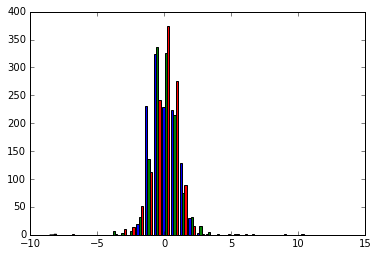

In [48]:
plt.hist(mat, bins=30)

In [49]:
km.fit(mat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [50]:
dict_pca2 = pca_ready.make_cluster_dictionary2(km, PA48)

In [51]:
dict_pca2

defaultdict(list,
            {0: ['Aaron Harrison',
              'Aaron McKie',
              'Adrian Griffin',
              'Alan Anderson',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Allen Crabbe',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andreas Glyniadakis',
              'Anfernee Hardaway',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Parker',
              'Anthony Tolliver',
              'Antoine Wright',
              'Antonio Anderson',
              'Antonio Davis',
              'Arvydas Macijauskas',
              'Austin Daye',
              'Austin Rivers',
              'Axel Toupane',
              'Ben Hansbrough',
              'Ben McLemore',
              'Bernard Robinson',
              'Billy Thomas',
              'Bo Outlaw',
           

# Try with original 8

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
standard_scaler = StandardScaler()

In [54]:
scaled = standard_scaler.fit_transform(PA48.iloc[:,:8])

In [55]:
km.fit(scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [56]:
dict_nonpca = pca_ready.make_cluster_dictionary2(km, PA48.iloc[:,:8])

In [57]:
dict_nonpca[0][:10]

['Aaron Harrison',
 'Aaron McKie',
 'Aaron Williams',
 'Adreian Payne',
 'Adrian Griffin',
 'Al-Farouq Aminu',
 'Alan Henderson',
 'Alex Kirk',
 'Alex Scales',
 'Alonzo Gee']

# 3D Plot on PCA

In [58]:
from mpl_toolkits.mplot3d import Axes3D

In [59]:
from scripts import makeplot

In [60]:
#makeplot.make_plots(mat)

In [61]:
mat.sort_values(by=2, ascending=False).head()

,0,1,2
1084,0.341502,2.746255,6.016554
218,-0.071424,1.671828,5.438820
791,-1.343239,0.039258,4.352449
991,-0.199994,-0.237832,2.799682
761,0.840035,0.410409,2.456701


In [62]:
PA48.index[[1061, 147, 550, 1039, 1084]]

Index([u'Steven Hill', u'Bryon Russell', u'Jerrelle Benimon', u'Sim Bhullar',
       u'Thanasis Antetokounmpo'],
      dtype='object', name=u'Player Name')

#### Points 1061, 147, 550, 1039, 1084 are problematic

# Find outliers that are messing up PCA

### Drop them from PCA

In [63]:
PA48_nout = PA48.drop(PA48.index[[1061, 147, 550, 1039, 1084]])

In [64]:
mat_nout, comp_nout = pca_ready.run_pca(PA48_nout.iloc[:,:8])

In [65]:
km = KMeans(n_clusters=5, random_state = 30)

In [66]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

In [67]:
dict_pca2_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout.iloc[:,:8])

In [68]:
dict_pca2_nout

defaultdict(list,
            {0: ['Al Horford',
              'Al Jefferson',
              'Alexis Ajinca',
              'Alonzo Mourning',
              "Amar'e Stoudemire",
              'Andray Blatche',
              'Andre Drummond',
              'Andrew Bynum',
              'Antawn Jamison',
              'Anthony Davis',
              'Anthony Randolph',
              'Aron Baynes',
              'Blake Griffin',
              'Boban Marjanovic',
              'Bobby Portis',
              'Bonzi Wells',
              'Brandan Wright',
              'Brandon Bass',
              'Brook Lopez',
              'Byron Mullens',
              'Carl Landry',
              'Carlos Boozer',
              'Carmelo Anthony',
              'Charlie Villanueva',
              'Chris Bosh',
              'Chris Kaman',
              'Chris Mihm',
              'Chris Webber',
              'Chris Wilcox',
              'Chris Wright',
              'Christian Wood',
              'Corey

# Regraph

In [69]:
#makeplot.make_plots(mat_nout, filename='rmoutlier')

# Silhouette Score Benchmark

In [70]:
from scripts import makesilplot

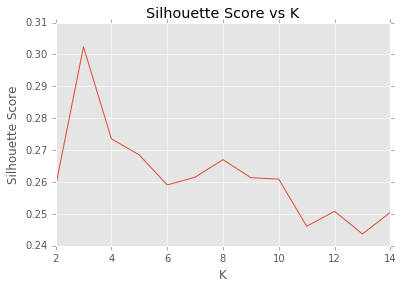

In [71]:
makesilplot.plot_silhouette(mat_nout, 15)

('For n_clusters =', 3, 'The average silhouette_score is :', 0.30189074575482516)


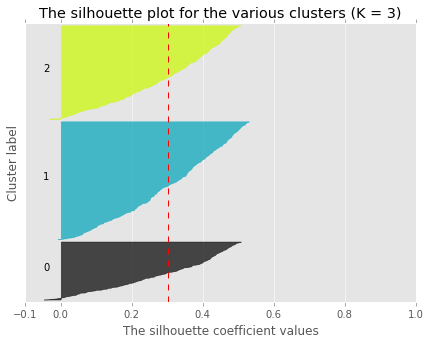

In [72]:
makesilplot.cluster_plot(mat_nout, 3)

('For n_clusters =', 4, 'The average silhouette_score is :', 0.27532763541740379)


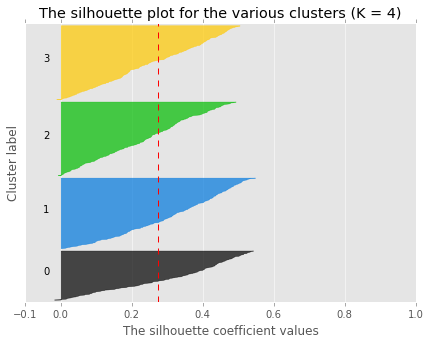

In [73]:
makesilplot.cluster_plot(mat_nout, 4)

##### data suggest not really clusterable

In [74]:
km = KMeans(n_clusters=3, random_state = 30)

In [75]:
km.fit(mat_nout)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=30, tol=0.0001,
    verbose=0)

##### lets look at the actual clusters

In [76]:
dict_pca4_nout = pca_ready.make_cluster_dictionary2(km, PA48_nout)
dict_pca4_nout[2][:10]

['Aaron Gordon',
 'Aaron Gray',
 'Aaron Williams',
 'Adonal Foyle',
 'Adreian Payne',
 'Adrian Griffin',
 'Al Horford',
 'Al Jefferson',
 'Al-Farouq Aminu',
 'Alan Henderson']

#### despite silhouette scores indicating clusters not optimal, clusters seem to make sense. This cluster has a very high density of guards. Steph Curry, Chris Paul, Steve Nash, Russell Westbrook, Tony Parker, Jeremy Lin.

# Cluster Sense

### Let us evaluate these clusters by looking at the 10 highest expected scores per cluster

In [77]:
player_score_list1 = []
for player in dict_pca4_nout[0]:
    player_score_list1.append((player, PA.ix[player, 'Score']))
sorted(player_score_list1, key=lambda x: x[1], reverse=True)[:10]

[('Carmelo Anthony', 39.16612903225807),
 ('Rudy Gay', 30.704022191400835),
 ('Joe Johnson', 30.112729498164011),
 ('Michael Redd', 28.352050473186114),
 ('Luol Deng', 28.288669301712776),
 ('Andrew Wiggins', 27.823750000000004),
 ('Jason Richardson', 27.75009174311927),
 ('DeMar DeRozan', 27.34701348747592),
 ('Danny Granger', 27.222013651877131),
 ('Stephen Jackson', 27.045886654478981)]

In [78]:
player_score_list2 = []
for player in dict_pca4_nout[1]:
    player_score_list2.append((player, PA.ix[player, 'Score']))
sorted(player_score_list2, key=lambda x: x[1], reverse=True)[:10]

[('LeBron James', 48.509443099273604),
 ('Kobe Bryant', 41.449301675977644),
 ('Chris Paul', 41.377691309987028),
 ('Dwyane Wade', 40.663025210084029),
 ('Russell Westbrook', 39.876068376068375),
 ('Allen Iverson', 39.085526315789465),
 ('Stephen Curry', 38.630487804878037),
 ('John Wall', 37.757582938388616),
 ('Damian Lillard', 34.916300940438866),
 ('James Harden', 34.63935969868173)]

In [79]:
player_score_list3 = []
for player in dict_pca4_nout[2]:
    player_score_list3.append((player, PA.ix[player, 'Score']))
sorted(player_score_list3, key=lambda x: x[1], reverse=True)[:10]

[('Kevin Durant', 42.540532081377151),
 ('Anthony Davis', 40.734999999999999),
 ('Blake Griffin', 39.687009803921562),
 ('Dwight Howard', 39.357861635220132),
 ('DeMarcus Cousins', 38.958212560386478),
 ('Yao Ming', 38.010330578512395),
 ('Pau Gasol', 37.770767195767199),
 ('Dirk Nowitzki', 36.52355828220859),
 ('Karl-Anthony Towns', 36.213924050632912),
 ('Kevin Love', 36.158171206225674)]

# Start aggregating players

In [80]:
clusteroneX, clusteroney = random_forest.date_with_forest(df, remove_date=False)

In [81]:
dict_pca4_nout

defaultdict(list,
            {0: ['Aaron Harrison',
              'Adam Morrison',
              'Adonis Thomas',
              'Al Harrington',
              'Al Thornton',
              'Alan Anderson',
              'Alando Tucker',
              'Alec Burks',
              'Alex Acker',
              'Alex Kirk',
              'Alex Scales',
              'Allan Ray',
              'Allen Crabbe',
              'Alonzo Gee',
              'Andre Dawkins',
              'Andre Emmett',
              'Andre Owens',
              'Andre Roberson',
              'Andrea Bargnani',
              'Andreas Glyniadakis',
              'Andres Nocioni',
              'Andrew Goudelock',
              'Andrew Nicholson',
              'Andrew Wiggins',
              'Andy Rautins',
              'Anthony Brown',
              'Anthony Goldwire',
              'Anthony Grundy',
              'Anthony Morrow',
              'Anthony Parker',
              'Anthony Roberson',
              'An

In [110]:
one_x = clusteroneX[clusteroneX['Player Name'].isin(dict_pca4_nout[1])]
one_y = clusteroney[clusteroney['Player Name'].isin(dict_pca4_nout[1])]

In [111]:
curryleftx = one_x[one_x['Player Name'] != 'Stephen Curry']
currylefty = one_y[one_y['Player Name'] != 'Stephen Curry']

In [112]:
onlycurryx = one_x[one_x['Player Name'] == 'Stephen Curry']
onlycurryy = one_y[one_y['Player Name'] == 'Stephen Curry']

In [113]:
today = datetime.date.today()
stop_average_date = today - datetime.timedelta(140)

In [114]:
aftercurryx = onlycurryx[onlycurryx['Date'] > stop_average_date]
aftercurryy = onlycurryy[onlycurryy['Date'] > stop_average_date]

In [115]:
beforecurryx = onlycurryx[onlycurryx['Date'] <= stop_average_date]
beforecurryy = onlycurryy[onlycurryy['Date'] <= stop_average_date]

In [116]:
from sklearn.cross_validation import train_test_split

In [117]:
aftercurryx_train, aftercurryx_test, aftercurryy_train, aftercurryy_test = train_test_split(aftercurryx[list(aftercurryx.columns-['Player Name','Date'])], aftercurryy.iloc[:,3], test_size = 0.25, random_state = 30)

/Users/ericpei/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


In [118]:
ClusterOne_xtrain = pd.concat([curryleftx, beforecurryx])
ClusterOne_ytrain = pd.concat([currylefty['FG'], beforecurryy['FG']])
ClusterOne_StephAvg = pd.concat([beforecurryy['FG'], aftercurryy_train]).mean()
#ClusterOne_ytrain = ClusterOne_ytrain.append(aftercurryy_train)

In [119]:
ClusterOne_xtrain = ClusterOne_xtrain.drop('Date', axis=1)

In [120]:
ClusterOne_rf = RandomForestRegressor()

In [121]:
ClusterOne_rf.fit(ClusterOne_xtrain.ix[:, ClusterOne_xtrain.columns != 'Player Name'], ClusterOne_ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [122]:
clustcurrypredictions = ClusterOne_rf.predict(aftercurryx_test)

In [123]:
mean_squared_error(clustcurrypredictions, aftercurryy_test)

21.597999999999995

In [124]:
#PA.loc['Stephen Curry', 'FG']

In [125]:
stephavg = np.empty(len(clustcurrypredictions))

In [126]:
ClusterOne_StephAvg

7.8586278586278588

In [127]:
stephavg.fill(ClusterOne_StephAvg)

In [128]:
mean_squared_error(stephavg, aftercurryy_test)

14.96801103038109

In [129]:
clustcurrypredictions

array([  8.4,  12.5,   8.6,   8.6,  10.4,  12. ,   8.5,  10.8,  12. ,
         8.6,   8.5,  10.2,   8.3,   7.2,  12.1])

In [130]:
aftercurryy_test

243587    11
243578     6
243615     7
243590     9
243618     9
243608    10
243588    12
243593    10
243611     4
243589     4
243594    12
243601    14
243624    15
243599    14
243597     5
Name: FG, dtype: int64

# Cluster Two

In [131]:
from scripts import random_forest

In [132]:
from scripts import clusters

In [133]:
PA140 = make_df.make_averages(df, cutoff=140)

In [134]:
cluster2predictions, true_2_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=2, cutoff=140)

In [135]:
true_2y_score = 2*true_2_y['FG'] + true_2_y['3P'] + true_2_y['FT'] + 1.2*true_2_y['TRB'] + 1.5*true_2_y['AST']\
                + 2*true_2_y['BLK'] + 2*true_2_y['STL'] - true_2_y['TOV']

In [136]:
mean_squared_error(true_2y_score, cluster2predictions['SCR'])

95.686613243050616

(-10, 75)

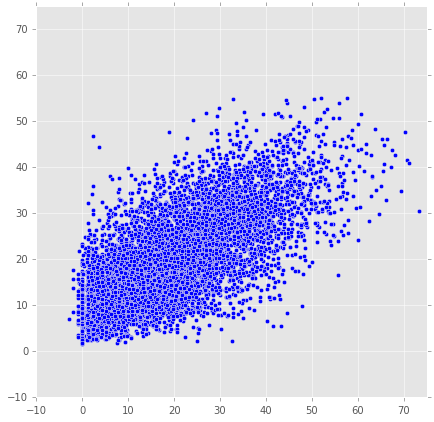

In [137]:
plt.figure(figsize=(7,7))
plt.scatter(true_2y_score, cluster2predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [138]:
from scipy import stats

In [139]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2y_score, cluster2predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.46445848106


In [140]:
true_2_y['SCRavg'] = true_2_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [141]:
mean_squared_error(true_2y_score, true_2_y['SCRavg'])

128.11373100914506

(-10, 75)

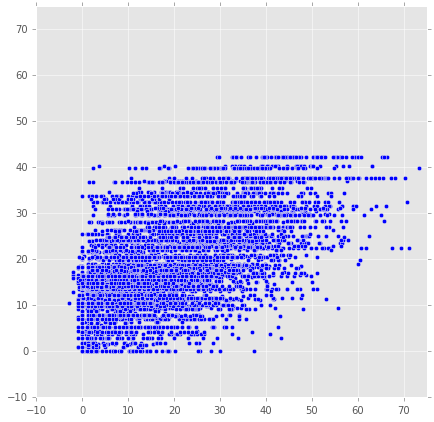

In [142]:
plt.figure(figsize=(7,7))
plt.scatter(true_2y_score, true_2_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [143]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2y_score, true_2_y['SCRavg'])

In [144]:
print "r-squared:", r_value**2

r-squared: 0.300242918552


# Cluster One

In [182]:
mean_squared_error(true_y['3P'], cluster1predictions['3P'])

5.2640750323415268

(-10, 14)

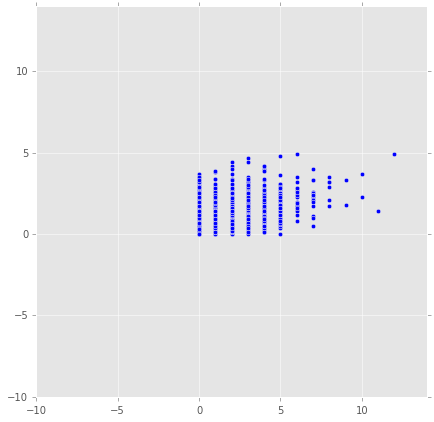

In [223]:
plt.figure(figsize=(7,7))
plt.scatter(true_y['3P'], cluster1predictions['3P'])
plt.xlim(-10,14)
plt.ylim(-10,14)

In [220]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_2_y['TRB'], cluster2predictions['TRB'])
print "r-squared:", r_value**2

r-squared: 0.319671975978


In [145]:
from scripts import clusters

In [146]:
cluster1predictions, true_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=1, cutoff=140)

In [147]:
true_y_score = 2*true_y['FG'] + true_y['3P'] + true_y['FT'] + 1.2*true_y['TRB'] + 1.5*true_y['AST']\
                + 2*true_y['BLK'] + 2*true_y['STL'] - true_y['TOV']

In [148]:
mean_squared_error(true_y_score, cluster1predictions['SCR'])

99.333298231996551

(-10, 75)

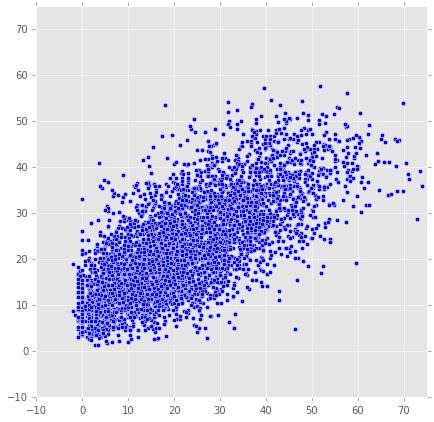

In [149]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, cluster1predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [150]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, cluster1predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.510888262312


In [151]:
true_y['SCRavg'] = true_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [152]:
mean_squared_error(true_y_score, true_y['SCRavg'])

145.5395371596718

(-10, 75)

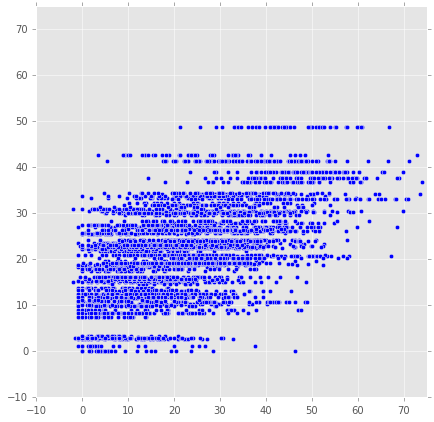

In [153]:
plt.figure(figsize=(7,7))
plt.scatter(true_y_score, true_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [154]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_y_score, true_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.301213861515


# Cluster Zero

In [155]:
cluster0predictions, true_0_y = clusters.get_predictions(df, cluster_dict=dict_pca4_nout, cluster_num=0, cutoff=140)

In [156]:
true_0y_score = 2*true_0_y['FG'] + true_0_y['3P'] + true_0_y['FT'] + 1.2*true_0_y['TRB'] + 1.5*true_0_y['AST']\
                + 2*true_0_y['BLK'] + 2*true_0_y['STL'] - true_0_y['TOV']

In [157]:
mean_squared_error(true_0y_score, cluster0predictions['SCR'])

77.237724569070181

(-10, 75)

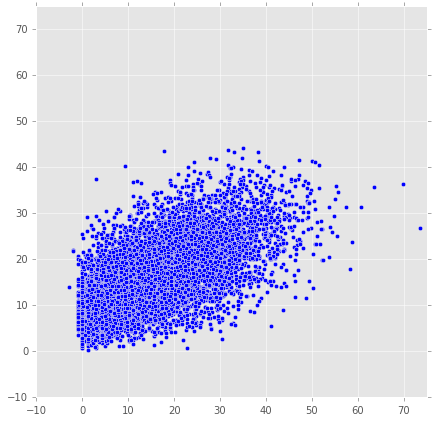

In [158]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, cluster0predictions['SCR'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [159]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, cluster0predictions['SCR'])
print "r-squared:", r_value**2

r-squared: 0.371341677582


In [160]:
true_0_y['SCRavg'] = true_0_y['Player Name'].apply(lambda x: PA140.ix[x, 'Score'] if x in PA140.index else 0)

In [161]:
mean_squared_error(true_0y_score, true_0_y['SCRavg'])

108.0565504118362

(-10, 75)

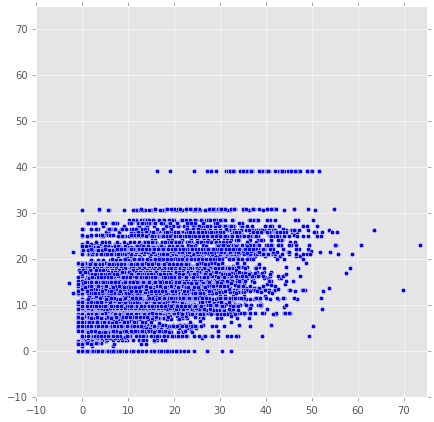

In [162]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score, true_0_y['SCRavg'])
plt.xlim(-10,75)
plt.ylim(-10,75)

In [163]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score, true_0_y['SCRavg'])
print "r-squared:", r_value**2

r-squared: 0.166620199971


# Total R^2

In [164]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))

88.896174355236042

(-10, 75)

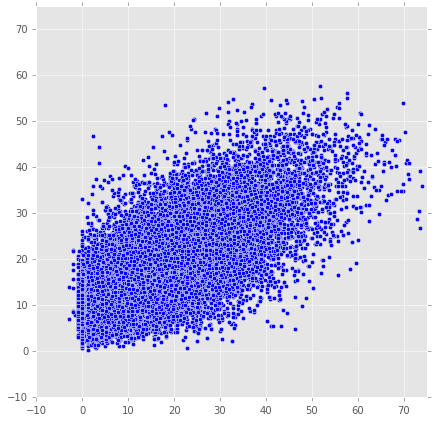

In [165]:
plt.figure(figsize=(7,7))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [166]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([cluster0predictions['SCR'], cluster1predictions['SCR'], cluster2predictions['SCR']]))
print "r-squared:", r_value**2

r-squared: 0.472407741328


In [167]:
mean_squared_error(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))

123.87009495090329

(-10, 75)

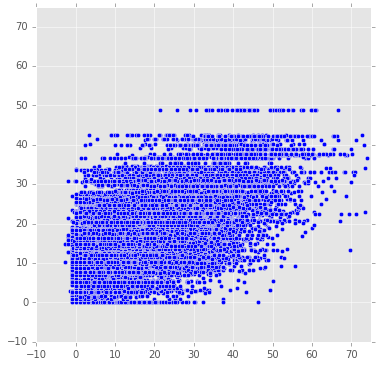

In [168]:
plt.figure(figsize=(6,6))
plt.scatter(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
plt.xlim(-10,75)
plt.ylim(-10,75)

In [169]:
slope, intercept, r_value, p_value, std_err = stats.linregress(true_0y_score.append(true_y_score.append(true_2y_score)), pd.concat([true_0_y['SCRavg'], true_y['SCRavg'], true_2_y['SCRavg']]))
print "r-squared:", r_value**2

r-squared: 0.288650686946


# Individual Model

In [170]:
#sc, scx, scy = random_forest.individual_forest_df(forest_df, y_df, 'Stephen Curry')

In [171]:
# from sklearn.cross_validation import train_test_split
# from sklearn.metrics import mean_squared_error

In [172]:
# fy, ydf = random_forest.date_with_forest(df,cutoff=120)

In [173]:
# curry_X = fy[fy['Player Name'] == 'Stephen Curry']
# curry_y = ydf[ydf['Player Name'] == 'Stephen Curry']

In [174]:
# scurryX_train, scurryX_test, scurryy_train, scurryy_test = train_test_split(curry_X[curry_X.columns-['Player Name']], curry_y.iloc[:,1], test_size = 0.25, random_state = 30)

In [175]:
# dictio = {}

In [176]:
# dictio['XYZ'] = RandomForestRegressor()

In [177]:
# dictio['XYZ'].fit(X_test,y_test)

In [178]:
# scurryX_test